In [1]:
import numpy as nm
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Dataset

In [4]:
fraud = pd.read_csv("C:\\Users\\anujr\\OneDrive\\Documents\\data analyst\\raw data\\fraud_dataset.csv")

In [5]:
pd.set_option('display.max_rows',None)


In [6]:
fraud.head()

,transaction_id,transaction_amount,location,merchant,age,gender,fraud_label
0,1,1000.0,New York,ABC Corp,35,M,0
1,2,500.0,Chicago,XYZ Inc,45,F,0
2,3,2000.0,Los Angeles,ABC Corp,28,M,1
3,4,1500.0,San Francisco,XYZ Inc,30,F,0
4,5,800.0,Chicago,ABC Corp,50,F,0


In [7]:
fraud.shape # this dataset include 86 rows and 7 columns

(86, 7)

In [8]:
fraud.info() # dataset include 3 variables having int and object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      86 non-null     int64  
 1   transaction_amount  86 non-null     float64
 2   location            86 non-null     object 
 3   merchant            86 non-null     object 
 4   age                 86 non-null     int64  
 5   gender              86 non-null     object 
 6   fraud_label         86 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.8+ KB


In [9]:
 for  var in fraud.columns:  
    print(fraud[var].value_counts()) # checking unique value in each columns

1     1
55    1
63    1
62    1
61    1
60    1
59    1
58    1
57    1
56    1
54    1
65    1
53    1
52    1
51    1
50    1
49    1
48    1
47    1
46    1
64    1
66    1
2     1
77    1
85    1
84    1
83    1
82    1
81    1
80    1
79    1
78    1
76    1
67    1
75    1
74    1
73    1
72    1
71    1
70    1
69    1
68    1
45    1
44    1
43    1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
42    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
22    1
23    1
24    1
41    1
40    1
39    1
38    1
37    1
36    1
35    1
34    1
33    1
32    1
31    1
30    1
29    1
28    1
27    1
26    1
25    1
86    1
Name: transaction_id, dtype: int64
2000.0    7
900.0     6
950.0     5
800.0     5
2800.0    4
1000.0    3
3200.0    3
1100.0    3
1050.0    3
750.0     3
1800.0    3
3000.0    3
1500.0    3
1250.0    3
1350.0    2
2400.0    2
920.0     2
850.0     2
1300.0    2
2100.0    2
1700.0    2
1400.0    2
2300.0    2
4

In [10]:
fraud.describe()

,transaction_id,transaction_amount,age,fraud_label
count,86.000000,86.000000,86.000000,86.000000
mean,43.500000,1623.430233,40.081395,0.186047
std,24.969982,799.196016,8.829383,0.391427
min,1.000000,500.000000,26.000000,0.000000
25%,22.250000,950.000000,32.250000,0.000000
50%,43.500000,1375.000000,39.500000,0.000000
75%,64.750000,2000.000000,47.750000,0.000000
max,86.000000,4000.000000,56.000000,1.000000


In [11]:
fraud.isnull().sum()

transaction_id        0
transaction_amount    0
location              0
merchant              0
age                   0
gender                0
fraud_label           0
dtype: int64

In [12]:
fraud.duplicated().sum()

0

In [13]:
# there is no null and duplicate data...so our data is cleaned.

In [14]:
#Data Analysis

In [15]:
fraud.keys()

Index(['transaction_id', 'transaction_amount', 'location', 'merchant', 'age',
       'gender', 'fraud_label'],
      dtype='object')

In [16]:
graph=fraud[['transaction_amount','location', 'merchant', 'age','gender', 'fraud_label']]

In [17]:
graph.head()

,transaction_amount,location,merchant,age,gender,fraud_label
0,1000.0,New York,ABC Corp,35,M,0
1,500.0,Chicago,XYZ Inc,45,F,0
2,2000.0,Los Angeles,ABC Corp,28,M,1
3,1500.0,San Francisco,XYZ Inc,30,F,0
4,800.0,Chicago,ABC Corp,50,F,0


In [18]:
amount_location=fraud.groupby(["location"],as_index=False)['transaction_amount'].sum().sort_values(by='transaction_amount',ascending=False)

In [19]:
amount_location

,location,transaction_amount
0,Chicago,42250.0
3,San Francisco,38275.0
1,Los Angeles,36750.0
2,New York,22340.0


<Axes: xlabel='location', ylabel='transaction_amount'>

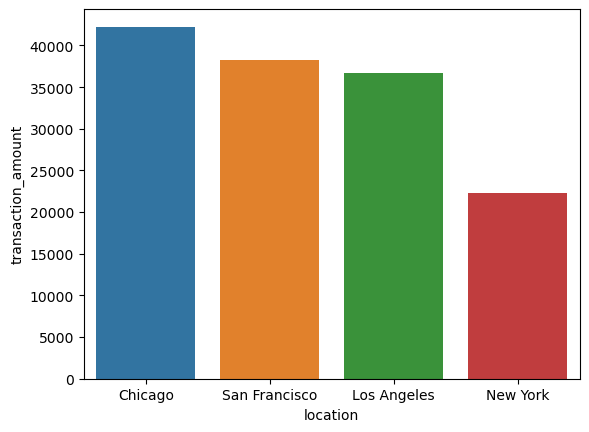

In [20]:
sns.barplot(x='location',y='transaction_amount',data=amount_location)

In [21]:
amount_merchant=fraud.groupby(["merchant"],as_index=False)['transaction_amount'].sum().sort_values(by='transaction_amount',ascending=False)

In [22]:
amount_merchant

,merchant,transaction_amount
1,XYZ Inc,80000.0
0,ABC Corp,59615.0


<Axes: xlabel='merchant', ylabel='transaction_amount'>

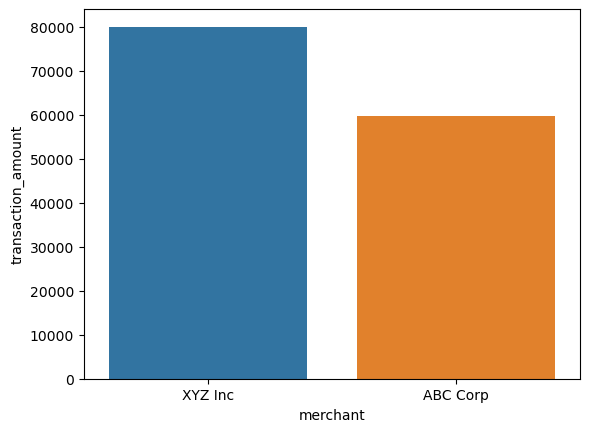

In [23]:
sns.barplot(x='merchant',y='transaction_amount',data=amount_merchant)

In [24]:
gender=fraud.groupby(["gender"],as_index=False)['transaction_amount'].sum().sort_values(by='transaction_amount',ascending=False)

In [25]:
gender

,gender,transaction_amount
1,M,81000.0
0,F,58615.0


<Axes: xlabel='gender', ylabel='transaction_amount'>

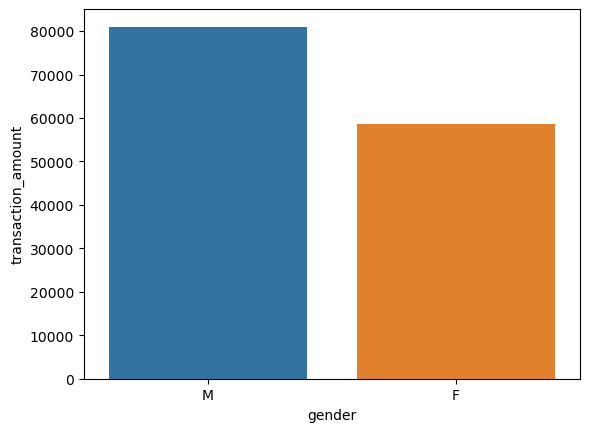

In [26]:
sns.barplot(x='gender',y='transaction_amount',data=gender)

In [27]:
gender_fraud=fraud.groupby(['fraud_label'],as_index=False)['gender'].value_counts().sort_values(by='gender',ascending=False)

In [28]:
gender_fraud #only fraud happen with 16 prople including 7 males and 9 females

,fraud_label,gender,count
0,0,M,36
3,1,M,7
1,0,F,34
2,1,F,9


In [29]:
fraud_1=graph[graph['fraud_label']==1]

fraud_1.groupby('gender')['transaction_amount'].sum() # fraud amount of male and female


gender
F    26500.0
M    20000.0
Name: transaction_amount, dtype: float64

In [30]:
result=fraud_1.groupby('gender')['location','age','merchant'].value_counts() # with location
result

C:\Users\anujr\AppData\Local\Temp\ipykernel_9672\2035903431.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result=fraud_1.groupby('gender')['location','age','merchant'].value_counts() # with location


gender  location       age  merchant
F       San Francisco  39   ABC Corp    2
                       48   ABC Corp    2
                       50   ABC Corp    2
        Chicago        33   ABC Corp    1
        San Francisco  45   ABC Corp    1
                       46   ABC Corp    1
M       Chicago        27   XYZ Inc     2
                       38   XYZ Inc     2
                       37   XYZ Inc     1
        Los Angeles    28   ABC Corp    1
        New York       42   XYZ Inc     1
dtype: int64

In [31]:
fraud_1


,transaction_amount,location,merchant,age,gender,fraud_label
2,2000.0,Los Angeles,ABC Corp,28,M,1
5,3000.0,New York,XYZ Inc,42,M,1
8,2500.0,Chicago,ABC Corp,33,F,1
14,3000.0,San Francisco,ABC Corp,45,F,1
19,4000.0,Chicago,XYZ Inc,38,M,1
23,2300.0,Chicago,XYZ Inc,27,M,1
26,2800.0,San Francisco,ABC Corp,39,F,1
34,3200.0,San Francisco,ABC Corp,48,F,1
42,2800.0,San Francisco,ABC Corp,50,F,1
47,1900.0,Chicago,XYZ Inc,38,M,1


In [32]:
fraud_pre=fraud

In [33]:
fraud_pre.head()

,transaction_id,transaction_amount,location,merchant,age,gender,fraud_label
0,1,1000.0,New York,ABC Corp,35,M,0
1,2,500.0,Chicago,XYZ Inc,45,F,0
2,3,2000.0,Los Angeles,ABC Corp,28,M,1
3,4,1500.0,San Francisco,XYZ Inc,30,F,0
4,5,800.0,Chicago,ABC Corp,50,F,0


In [34]:
fraud_pre=pd.get_dummies(fraud_pre)

In [35]:
fraud_pre.head()

,transaction_id,transaction_amount,age,fraud_label,location_Chicago,location_Los Angeles,location_New York,location_San Francisco,merchant_ABC Corp,merchant_XYZ Inc,gender_F,gender_M
0,1,1000.0,35,0,0,0,1,0,1,0,0,1
1,2,500.0,45,0,1,0,0,0,0,1,1,0
2,3,2000.0,28,1,0,1,0,0,1,0,0,1
3,4,1500.0,30,0,0,0,0,1,0,1,1,0
4,5,800.0,50,0,1,0,0,0,1,0,1,0


In [36]:
fraud_pre.shape #now dataset contain 86 rows and 12 columns

(86, 12)

In [232]:
X=fraud_pre.drop(['fraud_label','transaction_id'],axis=1)

In [233]:
Y=fraud_pre['fraud_label']

In [235]:
from sklearn.model_selection import train_test_split

In [237]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=23)

In [239]:
print("shape of X train",X_train.shape)
print("shape of X test",X_test.shape)
print("shape of Y train",Y_train.shape)
print("shape of Y test",Y_test.shape)

shape of X train (68, 10)
shape of X test (18, 10)
shape of Y train (68,)
shape of Y test (18,)


In [240]:
from sklearn.linear_model import LogisticRegression

In [241]:
lgr=LogisticRegression()
lgr.fit(X_train,Y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [242]:
lgr.score(X_test,Y_test)

1.0

In [243]:
lgr.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [195]:
Y_test

82    1
3     0
85    0
77    0
29    0
26    1
9     0
71    0
56    0
53    0
37    0
17    0
8     1
24    0
28    0
4     0
27    0
5     1
Name: fraud_label, dtype: int64

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [198]:
sc.mean_

array([1.57669118e+03, 4.00294118e+01, 2.64705882e-01, 2.20588235e-01,
       2.50000000e-01, 2.64705882e-01, 5.29411765e-01, 4.70588235e-01,
       5.14705882e-01, 4.85294118e-01])

In [199]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)


In [200]:
lgr.fit(X_train_sc,Y_train)

LogisticRegression()

In [201]:
lgr.score(X_test_sc,Y_test)

0.9444444444444444

In [202]:
# the accuracy of data remains same after Feature scaling the data

In [203]:
# use another model 

In [204]:
from sklearn.svm import SVC

In [205]:
cls=SVC(kernel='linear')

In [206]:
cls.fit(X_train,Y_train)
cls.score(X_test,Y_test)

0.9444444444444444

In [207]:
cls1=SVC(kernel='linear')

In [208]:
cls1.fit(X_train_sc,Y_train)
cls1.score(X_test_sc,Y_test)

0.9444444444444444

In [209]:
cls.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [210]:
# now checking with random forest tree

In [211]:
#from sklearn.ensemble import RandomForestClassifier

In [212]:
#rfc=RandomForestClassifier()

In [213]:
#rfc.fit(X_train,Y_train)
#rfc.score(X_test,Y_test) # minimum accuracy as comparison to others

In [214]:
#rfc.predict(X_test)


In [215]:
#using k nearst neighbour

In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
knc= KNeighborsClassifier()


In [218]:
knc.fit(X_train,Y_train)
knc.score(X_test,Y_test)

0.9444444444444444

In [219]:
knc.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [220]:
#using naive bayes classifier

In [221]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import MultinomialNB

In [222]:
#gn=GaussianNB()
#bn=BernoulliNB()
#mn=MultinomialNB()

In [223]:
#gn.fit(X_train,Y_train)
#gn.score(X_test,Y_test)

In [224]:
#bn.fit(X_train,Y_train)
#bn.score(X_test,Y_test)

In [225]:
#mn.fit(X_train,Y_train)
#mn.score(X_test,Y_test)

In [226]:
#gn.predict(X_test)

In [185]:
# only few model gives accuracy of 94..so i choose logistic regression model with best accuracy of 100

In [245]:
a=lgr.predict(X_test)

In [246]:
a

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [248]:
from sklearn.metrics import mean_squared_error

In [251]:
mse=mean_squared_error(Y_test,a)

In [252]:
mse

0.0

In [254]:
rmse=nm.sqrt(mse)

In [255]:
rmse

0.0

In [256]:
#now save the model

In [257]:
import pickle

In [258]:
pickle.dump(lgr,open("model_fraud_ml","wb"))